## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('results.csv')

In [3]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


In [6]:
df.tournament.value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
Dragon Cup                                  4
Copa América qualification                  2
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Name: tournament, Length: 112, dtype: int64

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [7]:
df_1=df[df.tournament=='FIFA World Cup']

In [9]:
df_1.sort_values(by='home_score',inplace=True)

C:\Users\User\AppData\Local\Temp/ipykernel_1768/3375894996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sort_values(by='home_score',inplace=True)


<AxesSubplot:xlabel='home_team', ylabel='home_score'>

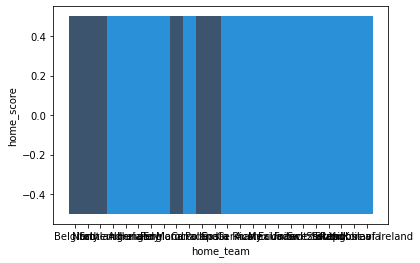

## Task
What is the number of matches played in each tournament throughout history?

## Task 
Show the trend in number of matches per year.

## Task
Which teams are the most successful ones? (winning percentage)

## Task
Which teams are the least successful ones? (winning percentage)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

## Task
Which teams played against each other the most?

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.